In [1]:
import os
import pandas as pd
import numpy as np
#import pylab as pl
from pylab import rcParams
import matplotlib.pyplot as pl
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [5]:
data = pd.read_csv('./Data/aapl_1.csv')

data['Date'] = pd.to_datetime(data['Date'])
data.head()


,Date,Price
0,2017-01-18,119.99
1,2017-01-17,120.00
2,2017-01-13,119.04
3,2017-01-12,119.25
4,2017-01-11,119.75


In [6]:
#data = data.sort_values(by=['Date'] )
data = data.sort_values(by=['Date'] , ascending=False)
data.head()

,Date,Price
0,2017-01-18,119.99
1,2017-01-17,120.00
2,2017-01-13,119.04
3,2017-01-12,119.25
4,2017-01-11,119.75


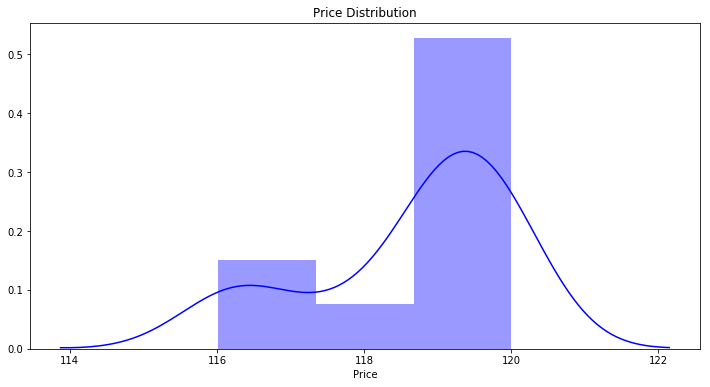

In [7]:
pl.figure(figsize=(12,6))
pl.title("Price Distribution")
ax = sns.distplot(data["Price"], color = 'b')


In [8]:
pl.show() # for .py

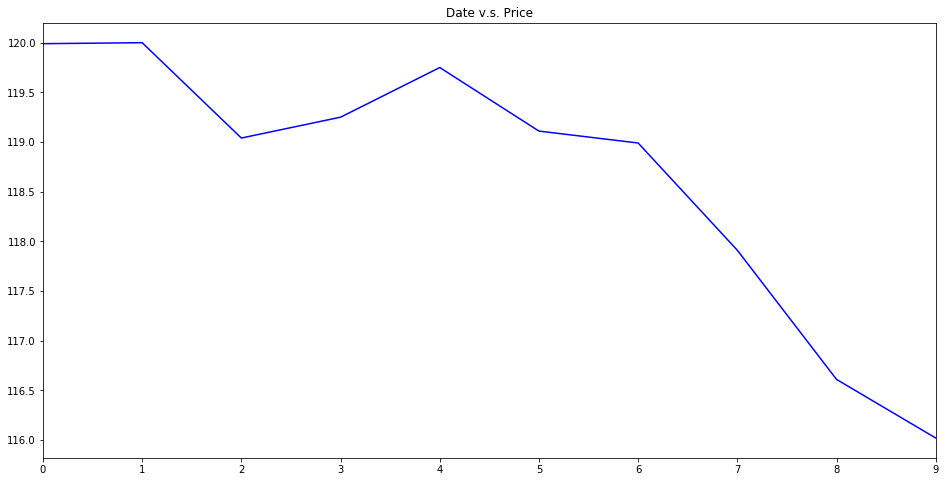

In [9]:
# plt Date vs. AveragePrice

# set the size of the figure
pl.figure(figsize=(16,8))

# set the title
pl.title("Date v.s. Price")

#ax = sns.tsplot(data, time="Date", value="Price")
ax = sns.tsplot(data["Price"], color = 'b')


In [10]:
pl.show() # for .py

In [11]:
pred_date = pd.to_datetime('2008-10-11')

In [12]:
# no need to add
# data = data.append(pd.Series([pred_date,0], index=data.columns ), ignore_index=True)

In [13]:
data.head()

,Date,Price
0,2017-01-18,119.99
1,2017-01-17,120.00
2,2017-01-13,119.04
3,2017-01-12,119.25
4,2017-01-11,119.75


In [14]:
data.tail()

,Date,Price
5,2017-01-10,119.11
6,2017-01-09,118.99
7,2017-01-06,117.91
8,2017-01-05,116.61
9,2017-01-04,116.02


In [15]:
# if added pred 
data = data.sort_values(by=['Date'])
data.head()

,Date,Price
9,2017-01-04,116.02
8,2017-01-05,116.61
7,2017-01-06,117.91
6,2017-01-09,118.99
5,2017-01-10,119.11


In [16]:
data.head()

,Date,Price
9,2017-01-04,116.02
8,2017-01-05,116.61
7,2017-01-06,117.91
6,2017-01-09,118.99
5,2017-01-10,119.11


In [17]:
data.tail()

,Date,Price
4,2017-01-11,119.75
3,2017-01-12,119.25
2,2017-01-13,119.04
1,2017-01-17,120.00
0,2017-01-18,119.99


In [18]:
#data.Date.get_values()
data.Date.size

10

In [19]:
data.Date.head()

9   2017-01-04
8   2017-01-05
7   2017-01-06
6   2017-01-09
5   2017-01-10
Name: Date, dtype: datetime64[ns]

In [20]:
pred_date.toordinal()

733326

In [21]:
pred_date_code = pred_date.toordinal()

In [22]:
pred_date_code

733326

In [23]:
# pred_date_code.fromordinal

In [24]:
data.Date.head()

9   2017-01-04
8   2017-01-05
7   2017-01-06
6   2017-01-09
5   2017-01-10
Name: Date, dtype: datetime64[ns]

In [25]:
import datetime as dt

data.Date = data.Date.map(dt.datetime.toordinal)


In [26]:
data.Date.head()

9    736333
8    736334
7    736335
6    736338
5    736339
Name: Date, dtype: int64

In [27]:
# data.Date = data.Date.map(dt.datetime.fromordinal)

In [28]:
data.Date.head()

9    736333
8    736334
7    736335
6    736338
5    736339
Name: Date, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

x = data.drop(['Price'], axis = 1)
y = data.Price

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [30]:
x_train.head(5)

,Date
0,736347
8,736334
3,736341
2,736342
6,736338


In [31]:
x_train.tail(5)

,Date
3,736341
2,736342
6,736338
9,736333
4,736340


In [32]:
x_test.head(5)

,Date
7,736335
1,736346
5,736339


In [33]:
x_test.tail(5)

,Date
7,736335
1,736346
5,736339


In [34]:
y_train.head(5)

0    119.99
8    116.61
3    119.25
2    119.04
6    118.99
Name: Price, dtype: float64

In [35]:
y_train.tail(5)

3    119.25
2    119.04
6    118.99
9    116.02
4    119.75
Name: Price, dtype: float64

In [36]:
y_test.head(5)

7    117.91
1    120.00
5    119.11
Name: Price, dtype: float64

In [37]:
y_test.tail(5)

7    117.91
1    120.00
5    119.11
Name: Price, dtype: float64

In [38]:
from sklearn.linear_model import LinearRegression

linreg =  LinearRegression().fit(x_train,y_train)
print("")
print("Linear Regression train data score:{:.3f}".format(linreg.score(x_train,y_train)))
print("")
print("Linear Regression test data score:{:.3f}".format(linreg.score(x_test,y_test)))
print("")



Linear Regression train data score:0.790

Linear Regression test data score:0.528



In [55]:
linreg_test_score = linreg.score(x_test,y_test) * 100
linreg_test_score = linreg_test_score.astype('int64')

In [56]:
linreg_test_score

52

In [57]:
linreg.score(x_train,y_train)

0.7896270634424992

In [58]:
y_train_int = y_train.astype('int64')
y_test_int = y_test.astype('int64')

In [59]:
y_train_int.head(5)

0    119
8    116
3    119
2    119
6    118
Name: Price, dtype: int64

In [60]:
y_test_int.head(5)

7    117
1    120
5    119
Name: Price, dtype: int64

In [61]:
from sklearn import utils
print(utils.multiclass.type_of_target(x_test))
print(utils.multiclass.type_of_target(y_test))
print(utils.multiclass.type_of_target(x_train))
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train_int))


multiclass
continuous
multiclass
continuous
multiclass


In [62]:
from sklearn.linear_model import LogisticRegression

logreg =  LogisticRegression(penalty='l1', tol=0.0001).fit(x_train,y_train_int)
print("")
print("Logistic Regression train data score:{:.3f}".format(logreg.score(x_train,y_train_int)))
print("")
print("Logistic Regression test data score:{:.3f}".format(logreg.score(x_test,y_test_int)))
print("")


Logistic Regression train data score:0.571

Logistic Regression test data score:0.333



In [63]:
import xgboost
from sklearn.metrics import explained_variance_score

# XGBoost Regressor
xgb = xgboost.XGBRegressor(n_estimators=500, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=8)
# fit data
xgb.fit(x_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [66]:
predictions = xgb.predict(x_test)

print("")
print(explained_variance_score(predictions,y_test))
print("")


0.7305323513447732



In [67]:
from sklearn.svm import SVR

svr_lin = SVR(kernel= 'linear', C= 1000 , cache_size=15000, shrinking=True).fit(x_train,y_train)
print("")
print("SVR Linear Model train data score:{:.3f}".format(svr_lin.score(x_train,y_train)))
print("")
print("SVR Linear Model test data score:{:.3f}".format(svr_lin.score(x_test,y_test)))
print("")



SVR Linear Model train data score:-30064698759882.664

SVR Linear Model test data score:-85622112184389.188



In [68]:
from sklearn.svm import SVR

svr_poly = SVR(kernel= 'poly', C= 100, degree= 2, cache_size=4000, shrinking=True).fit(x_train,y_train)
print("")
print("SVR Polynomial Model train data score:{:.3f}".format(svr_poly.score(x_train,y_train)))
print("")
print("SVR Polynomial Model test data score:{:.3f}".format(svr_poly.score(x_test,y_test)))
print("")



SVR Polynomial Model train data score:-605622049770152249338888818931007488.000

SVR Polynomial Model test data score:-1724345316544533008976156582914031616.000



In [69]:
from sklearn.svm import SVR

svr_rbf =  SVR(kernel= 'rbf', C= 100, gamma= 0.1, cache_size=4000, shrinking=True).fit(x_train,y_train)
print("")
print("SVR RBF Model train data score:{:.3f}".format(svr_rbf.score(x_train,y_train)))
print("")
print("SVR RBF Model test data score:{:.3f}".format(svr_rbf.score(x_test,y_test)))
print("")


SVR RBF Model train data score:0.995

SVR RBF Model test data score:0.602



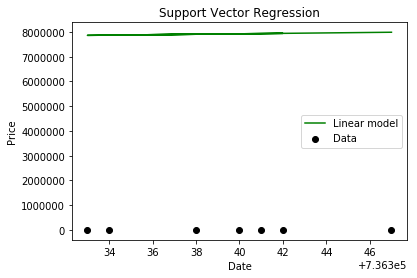

In [70]:

pl.scatter(x_train, y_train, color= 'black', label= 'Data') # plotting the initial datapoints 
pl.plot(x_train,svr_lin.predict(x_train), color= 'green', label= 'Linear model') # plotting the line made by linear kernel
pl.xlabel('Date')
pl.ylabel('Price')
pl.title('Support Vector Regression')
pl.legend()
pl.show()


NameError: name 'plt' is not defined

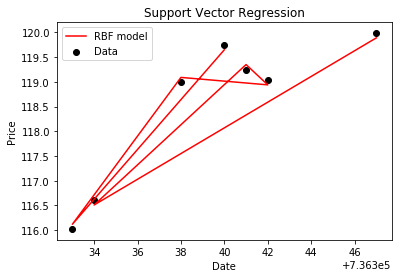

In [71]:

pl.scatter(x_train, y_train, color= 'black', label= 'Data') # plotting the initial datapoints 
pl.plot(x_train,svr_rbf.predict(x_train), color= 'red', label= 'RBF model') # plotting the line made by the RBF kernel
pl.xlabel('Date')
pl.ylabel('Price')
pl.title('Support Vector Regression')
pl.legend()
plt.show()

In [ ]:

pl.scatter(x_train, y_train, color= 'black', label= 'Data') # plotting the initial datapoints 
pl.plot(x_train,svr_poly.predict(x_train), color= 'blue', label= 'Polynomial model') # plotting the line made by polynomial kernel
pl.xlabel('Date')
pl.ylabel('Price')
pl.title('Support Vector Regression')
pl.legend()
pl.show()

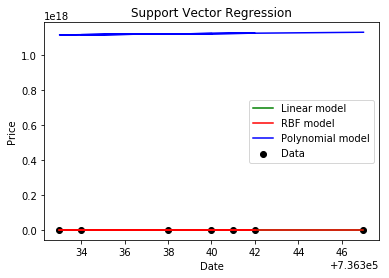

In [72]:

pl.scatter(x_train, y_train, color= 'black', label= 'Data') # plotting the initial datapoints 
pl.plot(x_train,svr_lin.predict(x_train), color= 'green', label= 'Linear model') # plotting the line made by linear kernel
pl.plot(x_train,svr_rbf.predict(x_train), color= 'red', label= 'RBF model') # plotting the line made by the RBF kernel
pl.plot(x_train,svr_poly.predict(x_train), color= 'blue', label= 'Polynomial model') # plotting the line made by polynomial kernel
pl.xlabel('Date')
pl.ylabel('Price')
pl.title('Support Vector Regression')
pl.legend()
pl.show()

In [73]:
pred_date

Timestamp('2008-10-11 00:00:00')

In [74]:
pred_date_code 

733326

In [75]:
pred_date_code_arry = (np.array([pred_date_code]).reshape(-1,1))
pred_date_code_arry

array([[733326]])

In [76]:
pred_date_code_arry[0]

array([733326])

In [77]:
predicted_price = svr_lin.predict(pred_date_code_arry)[0]
print (predicted_price)

-19201880.88500023


In [78]:
predicted_price = svr_rbf.predict(pred_date_code_arry)[0]
print (predicted_price)

118.43185726555024


In [79]:
predicted_price = svr_poly.predict(pred_date_code_arry)[0]
print (predicted_price)

-2.137170791572177e+18


In [80]:
predicted_price = linreg.predict(pred_date_code_arry)[0]
print (predicted_price)

-747.8290881147259


In [81]:
predicted_price = logreg.predict(pred_date_code_arry)[0]
print (predicted_price)

119


In [82]:
pred_date_code

733326

In [83]:
xgbdfObj = pd.DataFrame(pred_date_code, columns = ['Date'], index=['0']) 

In [84]:
xgbdfObj

,Date
0,733326


In [85]:
predicted_price = xgb.predict(xgbdfObj)
print (predicted_price)

[116.020546]


In [86]:
print (predicted_price[0])

116.020546
